In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_cars = pd.read_excel("./data/cars_consommation.xlsx", sheet_name="car", index_col=0)
df_cars.head()

,Type,City,Road (80km/h),Highway (130km/h),Car price,Capacity fuel
Name,,,,,,
Peugeot e-208,Electric,12,15,21,20000,50
"Citroën C3 II vti 1,6 120ch",gas,9,6,8,6500,50


In [3]:
df_fuel = pd.read_excel("./data/cars_consommation.xlsx", sheet_name="energy", index_col=0)
df_fuel.rename(columns={
  'Electricity': 'Electric',
  'Gas E10': 'gas'
}, inplace=True)
df_fuel.head()

,Electric,gas
2024-04-06,0.6,1.9


In [4]:
# price full tank
df_cars['Price_full_tank'] = df_cars.apply(lambda x: x['Capacity fuel'] * df_fuel['Electric'].iloc[0] if x['Type'] == 'Electric' else x['Capacity fuel'] * df_fuel['gas'].iloc[0], axis=1)
df_cars.head()

,Type,City,Road (80km/h),Highway (130km/h),Car price,Capacity fuel,Price_full_tank
Name,,,,,,,
Peugeot e-208,Electric,12,15,21,20000,50,30.0
"Citroën C3 II vti 1,6 120ch",gas,9,6,8,6500,50,95.0


In [5]:
# distance made per road type
drive = {
  "city": "City",
  "road": "Road (80km/h)",
  "highway": "Highway (130km/h)"
}
distance_made = {}
for k in drive:
  distance_made[k] = (df_cars['Capacity fuel'] * 100) / df_cars[drive[k]]
  
df_distance_made = pd.DataFrame.from_dict(distance_made)
merged = df_distance_made.merge(df_cars, left_index=True, right_index=True)
df_distance_made[['Type', 'Capacity fuel', 'Price_full_tank']] = merged[['Type', 'Capacity fuel', 'Price_full_tank']]
df_distance_made.head()


,city,road,highway,Type,Capacity fuel,Price_full_tank
Name,,,,,,
Peugeot e-208,416.666667,333.333333,238.095238,Electric,50,30.0
"Citroën C3 II vti 1,6 120ch",555.555556,833.333333,625.000000,gas,50,95.0


## Distance

In [6]:
trip_distance = 30 # in km
round_trip = trip_distance * 2

for k in drive:
  col_name = "conso_per_km_" + k
  df_distance_made[col_name] = df_distance_made.apply(lambda x: x['Price_full_tank'] / x[k], axis=1)
  
df_distance_made.head()

,city,road,highway,Type,Capacity fuel,Price_full_tank,conso_per_km_city,conso_per_km_road,conso_per_km_highway
Name,,,,,,,,,
Peugeot e-208,416.666667,333.333333,238.095238,Electric,50,30.0,0.072,0.090,0.126
"Citroën C3 II vti 1,6 120ch",555.555556,833.333333,625.000000,gas,50,95.0,0.171,0.114,0.152


Let's suppose we do 10 000km a year in city, how much will it cost in fuel?

In [10]:
nb_km = 20000
nb_km * df_distance_made['conso_per_km_city']

Name
Peugeot e-208                  1440.0
Citroën C3 II vti 1,6 120ch    3420.0
Name: conso_per_km_city, dtype: float64

Let's compare for each type of road, how much electric car is better than thermal car.  
**NB**: We consider the price of the car too.

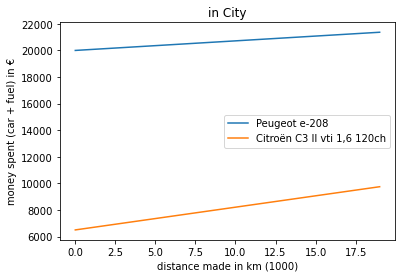

In [21]:
tab_val = []
for i in range(len(df_distance_made)):
  tab_val.append([])

km_unit = 1000
for i in range(1, nb_km, km_unit):
  df = i * df_distance_made['conso_per_km_city']
  for j in range(len(df)):
    tab_val[j].append(df.iloc[j])

for i in range(len(tab_val)):
  tab_val[i] += df_cars.iloc[i]['Car price']

for i in range(len(tab_val)):
  plt.plot(tab_val[i], label=df_cars.iloc[i].name)
  plt.xlabel(f"distance made in km ({km_unit})")
  plt.ylabel("money spent (car + fuel) in €")
  plt.legend()
  plt.title("in City")
plt.show()

We see that for a use of 20 000km a year, gasoline is still a better choice in terms of economy.  
However, we can see that the slope of the line representing the gasoline car is higher than the electric's one, which means that at a certain point, electric will be less expensive.

In [12]:
# TODO
# mathematic proof here
# calculation of the slope, then breaking point